# **Centrality Analysis**

Workflow:
1) Perform the 3 centrality analyses on entire network, commenting on features and relevance as we discover them
2) Perform same 3 analyses on the subnetwork of proteins of interest, comparing to main graph
3) Add Pathogen Nodes, Repeat steps 1 & 2 

## **Introduction** - Understanding Centrality

The structure of complex networks such as PPINs are often very heterogenous and it can be expected that some proteins will be more important than others when considering functionality, and in our case, their role in disease. The importance of these proteins can be quantified by a measure of network centrality, in which the most 'central' proteins score higher in this measure and are typically the most influential over the flow of information within the network.For this study, we will consider three different definitions of what it means for a protein to be a central in our network, and use these definitions to identify important hubs and bottlenecks which may serve as targets for therapeutic intervention. For this analysis we will be using betweenness, degree, and closeness centrality, each of which are described, along with their considerations in the next section.


## Betweenness Centrality:

Using this definition of centrality, a node is central if there are many shortest paths running through it. For example, if we imagine a metabolic network composed of various enzymes which transform basic nutrients into functional proteins and suppose we identify an enzyme that catalyzes a reaction that forms an intermediate metabolite common to all final products, we would label that protein enzyme as having a high betweenness centrality. Specifically, this measure of centrality can be described in the following formula:

$$B_{i}= \sum_{a,b}\frac{\eta(a,i,b)}{\eta(a,b)}$$

where $\eta(a,i,b)$ represents the number of shortest paths connecting nodes $\textit{a}$ and $\textit{b}$ that pass through vertex $\textit{i}$ and $\eta(a,b)$ represents the total number of shortest paths that exist between $\textit{a}$ and $\textit{b}$. This calculation of $B_{i}$ can be simply understood as the summation of the proportions of the number of node pairs in the network that include i along their connecting path out of the total number of possible paths from $\textit{a}$ to $\textit{b}$. Given this, a higher $B_{i}$ value indicates the node is more central.

Identifying proteins in our network with a high $B_{i}$ should reveal bottlenecks, where two communities are linked together by a single, or few proteins. If bottleneck proteins are disrupted, the information flow between the connected communities would likely stop, resulting in large changes in the functionality of those communities.  

##  Degree Centrality:

Defining a node as central by its degree is another common way of measuring centrality. Using this definition, a node is central if it has a high degree, meaning there are many edges connecting it. This formula can be represented as: 

$$k_{i} = \sum_{j=1}^{N}A_{ij}$$

where $\textit{i}$ is the node of interest, N is the number of nodes in the network, and j is another node within the network. This definition of centrality is better used when interested in local centrality, such as identifying major general hubs. An example of this might be identifying a signal transduction factor that is implemented in a wide variety of cellular functions. A major limitation when using this definition of centrality is that the node labeled as central may exist at the periphery of the network and not actually be located in the center, topographically. 

## Closeness Centrality:

Lastly, we will be considering the closeness definition of centrality. Under this definition, a node is considered central if it is close to all other nodes in the network. This can be calculated as the average distance of each node to all other nodes and can represented as: $$C_{i} = \frac{N}{\sum_{j=1,j\neq{i}}^{N}d_{ij}}$$ 

where $C_{i}$ is the measure of centrality at a particular node i, N is the total number of nodes in the network, and $d_{ij}$ is the length of the shortest path between i and j.

This definition is intuitive in that one might expect information in a protein network to flow through the shortest distances, and works best for networks with larger variability in path length. A drawback of this working definition is that in PPINs where the variability in average pathlength is small, defining a protein as central may be meaningless if the diameter of the network is small.

_____________________________________________________________________________________________________

# **Centrality Analysis of the Healthy Network:**

In [110]:
import networkx as nx
import matplotlib.pyplot as plt

#import graph
file = open("../Data/Macrophage_protein_network_with_attributes.pkl", "rb")
G = nx.read_gpickle(file)

## Overview:

### Here we will examine the central nodes of the healthy human macrophage protein network and determine what role they play, serving either as a hub or bottleneck. We will be applying the three different definitions of centrality described above.

### **Betweenness Centrality:**

In [64]:
#Calculating betweenness centrality:
betweenness_centralities = nx.betweenness_centrality(G)

There are 7 nodes with a betweenness centrality of at least 0.06
The nodes are: ['P16401', 'Q9H257', 'P08631', 'Q02930', 'P02545', 'P59046', 'Q8NI38']


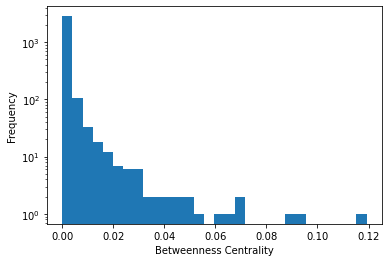

In [94]:
#sort dictionary so nodes with highest betweenness centrality are at the top
betweenness_sorted = dict(sorted(betweenness_centralities.items(), reverse = True, key=lambda x:x[1]))

#Display the range of betweenness centrality measures 
def betweenness_centrality_plot(dict):
    centrality_list = [] 
    for key,value in betweenness_sorted.items():
        centrality_list.append(value)
    plot = plt.hist(centrality_list, log=True, bins = 30)
    plt.xlabel("Betweenness Centrality")
    plt.ylabel("Frequency")
    return(plot)

betweenness_centrality_plot(betweenness_sorted); 

#Select all nodes that have a betweenness centrality of at least 0.06:
betweenness_central_nodes = []
for key,value in betweenness_sorted.items():
    if value >= 0.06:
        betweenness_central_nodes.append(key)
        
#print(betweenness_sorted)
print("There are {} nodes with a betweenness centrality of at least 0.06".format(len(betweenness_central_nodes))) 
print("The nodes are: {}".format(betweenness_central_nodes))

Now that we have selected 7 nodes that have the highest betweeneness centrality, lets determine if those nodes are hubs or bottlenecks by viewing their place within the network

In [84]:
#Goal: create 7 subgraphs where each subgraph is the central node plus its neighbors neighbors
def second_neighbors(graph, node) -> list:
    """Takes a graph and a node of choice and returns a list of the unique neighborhood nodes of the second degree for the given node"""
    node = str(node)
    return ([second_neighbor 
            for first_neighbor in graph.neighbors(node)
            for second_neighbor in graph.neighbors(first_neighbor) 
            if second_neighbor != node])

#Save each subgraph as a class object in a list
graph_list = []
for node in betweenness_central_nodes:
    subgraph_list = second_neighbors(G,node)
    subgraph = G.subgraph(subgraph_list)
    graph_list.append(subgraph)
    
#Need to actually graph things and see edges. nx.draw doesnt show edges?

Graph with 61 nodes and 9 edges


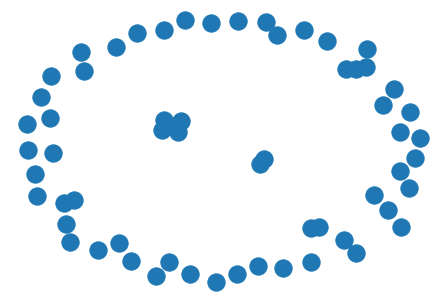

In [70]:
nx.draw(graph_list[0])
print(graph_list[0])

Stll need to visualize edges to determine if these central nodes are bottlenecks or hubs-

### **Degree Centrality:**

In [101]:
#Calculating Degree Centrality
Degree_centralities = nx.degree_centrality(G)

There are 6 nodes with a Degree centrality of at least 0.03
The nodes are: ['P16401', 'Q9H257', 'Q02930', 'Q8NEC5', 'Q8NI38', 'Q13422']


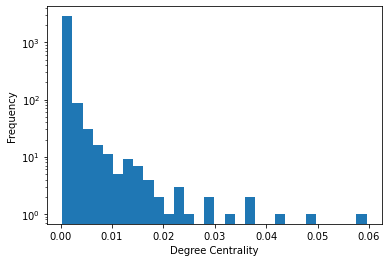

In [100]:
#sort dictionary so nodes with highest degree centrality are at the top
Degree_sorted = dict(sorted(Degree_centralities.items(), reverse = True, key=lambda x:x[1]))

#Display the range of Degree centrality measures 
def Degree_centrality_plot(dict):
    centrality_list = [] 
    for key,value in Degree_sorted.items():
        centrality_list.append(value)
    plot = plt.hist(centrality_list, log=True, bins = 30)
    plt.xlabel("Degree Centrality")
    plt.ylabel("Frequency")
    return(plot)

Degree_centrality_plot(Degree_sorted); 

#Select all nodes that have a degree centrality of at least 0.03:
degree_central_nodes = []
for key,value in Degree_sorted.items():
    if value >= 0.03:
        degree_central_nodes.append(key)
        
#print(betweenness_sorted)
print("There are {} nodes with a Degree centrality of at least 0.03".format(len(degree_central_nodes)))  
print("The nodes are: {}".format(degree_central_nodes))

Need to visualize neighborhoods of these nodes, are they bottlnecks or hubs?

In [ ]:
#code here, explore and talk about biological relevance of findings

### **Closeness Centrality:**

In [97]:
#Calculating Closeness Centrality
Closeness_centralities = nx.closeness_centrality(G)

There are 28 nodes with a Closeness centrality of at least 0.25
The nodes are: ['P08631', 'P59046', 'Q9H257', 'P02545', 'P43405', 'Q15323', 'Q6A162', 'Q9P2A4', 'P00533', 'P26951', 'Q8NI38', 'Q02930', 'A8MQ03', 'P05107', 'Q13094', 'P01375', 'P16401', 'Q8TB24', 'P31146', 'P62993', 'Q13422', 'P60410', 'P05067', 'Q8NEC5', 'O43586', 'Q96QH2', 'P04271', 'O75031']


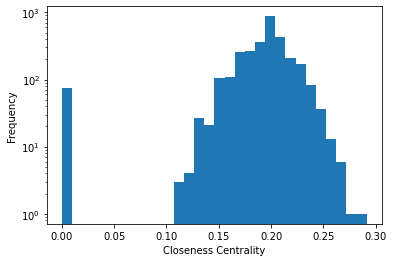

In [109]:
#sort dictionary so nodes with highest degree centrality are at the top
Closeness_sorted = dict(sorted(Closeness_centralities.items(), reverse = True, key=lambda x:x[1]))

#Display the range of Degree centrality measures 
def Closeness_centrality_plot(dict):
    centrality_list = [] 
    for key,value in Closeness_sorted.items():
        centrality_list.append(value)
    plot = plt.hist(centrality_list, log=True, bins = 30)
    plt.xlabel("Closeness Centrality")
    plt.ylabel("Frequency")
    return(plot)

Closeness_centrality_plot(Closeness_sorted); 

#Select all nodes that have a Closeness centrality of at least 0.25:
closeness_central_nodes = []
for key,value in Closeness_sorted.items():
    if value >= 0.25:
        closeness_central_nodes.append(key)
        
#print(closeness_sorted)
print("There are {} nodes with a Closeness centrality of at least 0.25".format(len(closeness_central_nodes)))  
print("The nodes are: {}".format(closeness_central_nodes))

Need to visualize neighborhoods of these nodes, are they bottlenecks or hubs?

In [10]:
#code here, explore and talk about biological relevance of findings

important takeaways

## Overall Conclusions

Comment on Patterns observed across all three, key things to mention

_________________________________________________________________________________

# ***Centrality Analysis of the Healthy Sub-network***

In [11]:
#Code to import all modules used for entire section - just for ease of deployment

## Overview:

overall goal for this second analysis.

## Extracting the subgraph:

Description of problem, and goal here

In [ ]:
#Code to get the subgraph out

## Betweenness Centrality:

In [ ]:
#code to do the analysis, and descriptions of findings

Comment on similiarity/ differences

## Degree Centrality:

In [ ]:
#code to do the analysis, and descriptions of findings

Comment on similiarity/differences

## Closeness Centrality:

In [ ]:
#code to do the analysis, and descriptions of findings

Comment on similiarity/differences

## Overall Conclusions:

Overall comparison of subgraph to main network

_____________________________________________________________________________________________________

# **Centrality Analysis of the Diseased Network**

In [11]:
#Code to import all modules used for entire section - just for ease of deployment

## Overview:

overall goal of this third analysis

## Adding Pathogen Nodes:

What, why, and how (remove this section if pulling diseased network from saved disease network)

In [ ]:
#Code to add nodes

## Betweenness Centrality:

In [ ]:
#Code to analyze it. talk about features as they arise

Takeaways and comparisons to healthy network

## Degree Centrality:

In [ ]:
#Code to analyze it. talk about features as they arise

Takeaways and comparisons to healthy network

## Closeness Centrality:

In [ ]:
#Code to analyze it. talk about features as they arise

Takeaways and comparisons to healthy network

## Overall Conclusions

Overall comparison of diseased whole-network to healthy whole-network

____________________________________________________________________________________________________

# **Centrality Analysis of the Diseased Sub-network**

In [11]:
#Code to import all modules used for entire section - just for ease of deployment

## Overview:

overall goal of 4th analysis

## Extracting the diseased sub-network:

description of what,why and how

In [ ]:
#Code to do it, talk about features as they arise

## Betweenness Centrality:

In [ ]:
#Code to analyze it. talk about features as they arise

Takeaways and comparisons to healthy sub-network

## Degree Centrality:

In [ ]:
#Code to analyze it. talk about features as they arise

Takeaways and comparisons to healthy sub-network

## Closeness Centrality:

In [ ]:
#Code to analyze it. talk about features as they arise

Takeaways and comparisons to healthy sub-network

## Overall Conclusions

Overall comparison of diseased whole-network to healthy whole-network

_______________________________________________________________________________________________

# **Remarks from Centrality Analysis**

What are key takeaways are from comparing all four networks?